# GDP and life expectancy

Richer countries can afford to invest more on healthcare, on work and road safety, and other measures that reduce mortality. On the other hand, richer countries may have less healthy lifestyles. Is there any relation between the wealth of a country and the life expectancy of its inhabitants?

The following analysis checks whether there is any correlation between the total gross domestic product (GDP) of a country in 2018 and the life expectancy of people born in that country in 2018.

## Getting the data

Two datasets of the World Bank are considered. One dataset, available at <http://data.worldbank.org/indicator/NY.GDP.MKTP.CD>, lists the GDP of the world's countries in current US dollars, for various years. The use of a common currency allows us to compare GDP values across countries. The other dataset, available at <http://data.worldbank.org/indicator/SP.DYN.LE00.IN>, lists the life expectancy of the world's countries. The datasets were downloaded as excel files in June 2021.

In [54]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

YEAR = 2018
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset = pd.read_excel('WB GDP 2018.xls')

LIFE_INDICATOR = 'SP.DYN.LE00.IN'
lifeReset = pd.read_excel('WB LE 2018.xls')

gdpReset.head()

,Country Name,Year,NY.GDP.MKTP.CD
0,Andorra,2018,1.835388e+10
1,Arab World,2018,1.013532e+11
2,United Arab Emirates,2018,1.514702e+10
3,Argentina,2018,3.218316e+09
4,Armenia,2018,2.771384e+12


In [53]:
gdpReset.tail()

,Country Name,Year,NY.GDP.MKTP.CD
244,Zambia,2018,7.942962e+09
245,Zimbabwe,2018,2.348627e+10
246,NaN,2018,3.682889e+11
247,NaN,2018,2.631214e+10
248,NaN,2018,2.431156e+10


In [52]:
lifeReset.head()

,Country Name,Year,SP.DYN.LE00.IN,2019
0,Aruba,2018.0,2018.000,NaN
1,Afghanistan,2018.0,76.152,NaN
2,Angola,2018.0,64.486,NaN
3,Albania,2018.0,60.782,76.293
4,Andorra,2018.0,78.458,64.833


In [42]:
#viewing the last 5
lifeReset.tail()

,Country Name,Year,SP.DYN.LE00.IN,2019
262,Zambia,2018.0,63.857,72.495122
263,Zimbabwe,2018.0,63.510,66.125000
264,NaN,NaN,61.195,64.131000
265,NaN,NaN,NaN,63.886000
266,NaN,NaN,NaN,61.490000


## Cleaning the data
Inspecting the data with `head()` and `tail()` shows that:


In [43]:
gdpCountries = gdpReset.dropna()
lifeCountries = lifeReset.dropna()

In [44]:
gdpCountries


,Country Name,Year,NY.GDP.MKTP.CD
0,Andorra,2018,1.835388e+10
1,Arab World,2018,1.013532e+11
2,United Arab Emirates,2018,1.514702e+10
3,Argentina,2018,3.218316e+09
4,Armenia,2018,2.771384e+12
...,...,...,...
241,Kosovo,2018,9.147005e+08
242,"Yemen, Rep.",2018,8.643942e+13
243,South Africa,2018,8.214961e+08
244,Zambia,2018,7.942962e+09


## Transforming the data
The World Bank reports GDP in US dollars and cents. To make the data easier to read, the GDP is converted to millions of British pounds (the author's local currency) with the following auxiliary functions, using the average 2013 dollar-to-pound conversion rate provided by <http://www.ukforex.co.uk/forex-tools/historical-rate-tools/yearly-average-rates>. 

In [45]:
#Transforming data

def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd / 1.564768

GDP = 'GDP (£m)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(roundToMillions)
gdpCountries.head()
gdpCountries.tail()

<ipython-input-45-993597d7a883>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(roundToMillions)


,Country Name,Year,NY.GDP.MKTP.CD,GDP (£m)
241,Kosovo,2018,9.147005e+08,585
242,"Yemen, Rep.",2018,8.643942e+13,55241047
243,South Africa,2018,8.214961e+08,525
244,Zambia,2018,7.942962e+09,5076
245,Zimbabwe,2018,2.348627e+10,15009


In [46]:
COUNTRY = 'Country Name'
headings = [COUNTRY, GDP]
gdpClean = gdpCountries[headings]
gdpClean.head()

,Country Name,GDP (£m)
0,Andorra,11729
1,Arab World,64772
2,United Arab Emirates,9680
3,Argentina,2057
4,Armenia,1771115


In [47]:
LIFE = 'Life expectancy (years)'
lifeCountries[LIFE] = lifeCountries[LIFE_INDICATOR].apply(round)
headings = [COUNTRY, LIFE]
lifeClean = lifeCountries[headings]
lifeClean.head()

<ipython-input-47-62070c039e83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifeCountries[LIFE] = lifeCountries[LIFE_INDICATOR].apply(round)


,Country Name,Life expectancy (years)
3,Albania,61
4,Andorra,78
6,United Arab Emirates,72
8,Armenia,77
9,American Samoa,75


## Combining the data

The tables are combined through an inner join on the common 'country' column.

In [48]:
gdpVsLife = pd.merge(gdpClean, lifeClean, on=COUNTRY, how='inner')
gdpVsLife.head()

,Country Name,GDP (£m),Life expectancy (years)
0,Andorra,11729,78
1,United Arab Emirates,9680,72
2,Armenia,1771115,77
3,American Samoa,269826,75
4,Australia,7962,77


In [55]:
gdpVsLife = pd.merge(gdpClean, lifeClean, on=COUNTRY, how='outer')
gdpVsLife.head()

,Country Name,GDP (£m),Life expectancy (years)
0,Andorra,11729.0,78.0
1,Arab World,64772.0,NaN
2,United Arab Emirates,9680.0,72.0
3,Argentina,2057.0,NaN
4,Armenia,1771115.0,77.0


In [56]:
gdpVsLife = pd.merge(gdpClean, lifeClean, on=COUNTRY, how='right')
gdpVsLife.head()

,Country Name,GDP (£m),Life expectancy (years)
0,Albania,NaN,61
1,Andorra,11729.0,78
2,United Arab Emirates,9680.0,72
3,Armenia,1771115.0,77
4,American Samoa,269826.0,75


In [57]:
gdpVsLife = pd.merge(gdpClean, lifeClean, on=COUNTRY, how='left')
gdpVsLife.head()

,Country Name,GDP (£m),Life expectancy (years)
0,Andorra,11729,78.0
1,Arab World,64772,NaN
2,United Arab Emirates,9680,72.0
3,Argentina,2057,NaN
4,Armenia,1771115,77.0


## Calculating the correlation

To measure if the life expectancy and the GDP grow together, the Spearman rank correlation coefficient is used. It is a number from -1 (perfect inverse rank correlation: if one indicator increases, the other decreases) to 1 (perfect direct rank correlation: if one indicator increases, so does the other), with 0 meaning there is no rank correlation. A perfect correlation doesn't imply any cause-effect relation between the two indicators. A p-value below 0.05 means the correlation is statistically significant.

In [49]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLife[GDP]
lifeColumn = gdpVsLife[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is -0.0845785500545107
It is not statistically significant.


The value shows a direct correlation, i.e. richer countries tend to have longer life expectancy, but it is not very strong

## Showing the data

Measures of correlation can be misleading, so it is best to see the overall picture with a scatterplot. The GDP axis uses a logarithmic scale to better display the vast range of GDP values, from a few million to several billion (million of million) pounds.

<AxesSubplot:xlabel='GDP (£m)', ylabel='Life expectancy (years)'>

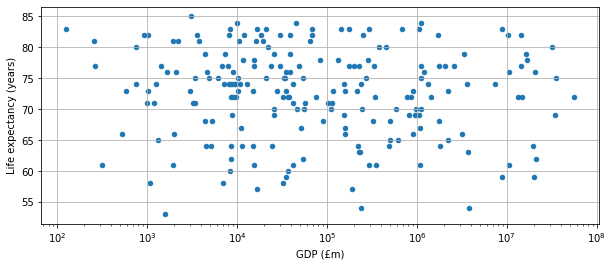

In [50]:
%matplotlib inline
gdpVsLife.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10, 4))

The plot shows there is no clear correlation: there are rich countries with low life expectancy, poor countries with high expectancy, and countries with around 10 thousand (104) million pounds GDP have almost the full range of values, from below 50 to over 80 years. Towards the lower and higher end of GDP, the variation diminishes. Above 40 thousand million pounds of GDP (3rd tick mark to the right of 104), most countries have an expectancy of 70 years or more, whilst below that threshold most countries' life expectancy is below 70 years.

Comparing the 10 poorest countries and the 10 countries with the lowest life expectancy shows that total GDP is a rather crude measure. The population size should be taken into account for a more precise definiton of what 'poor' and 'rich' means. Furthermore, looking at the countries below, droughts and internal conflicts may also play a role in life expectancy.

In [51]:
# the 10 countries with lowest GDP
gdpVsLife.sort_values(GDP).head(10)

,Country Name,GDP (£m),Life expectancy (years)
101,Kuwait,126,83
64,Georgia,257,81
178,Slovenia,263,77
193,Trinidad and Tobago,313,61
208,South Africa,525,66
206,Kosovo,585,73
72,Guam,747,74
38,Caribbean small states,753,80
70,Grenada,932,82
191,South Asia (IDA & IBRD),997,71


## Conclusions

To sum up, there is no strong correlation between a country's wealth and the life expectancy of its inhabitants: there is often a wide variation of life expectancy for countries with similar GDP, countries with the lowest life expectancy are not the poorest countries, and countries with the highest expectancy are not the richest countries. Nevertheless there is some relationship, because the vast majority of countries with a life expectancy below 70 years is on the left half of the scatterplot.

Using the [NY.GDP.PCAP.PP.CD](http://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD) indicator, GDP per capita in current 'international dollars', would make for a better like-for-like comparison between countries, because it would take population and purchasing power into account. Using more specific data, like expediture on health, could also lead to a better analysis.